In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import numpy as np
import seaborn as sns

In [2]:
def load_data_txt(path):
    f = open(path, "r")
    list_of_words = f.readlines()
    new_list = []
    for l in list_of_words:
        words = []
        for word in l[1:-3].split(', '):
            words += [word[1:-1]]
        new_list += [words]
    return new_list

In [3]:
def jaccard_similarity(top_words_a, top_words_b, k = 10):
    A = set(top_words_a[:k])
    B = set(top_words_b[:k])
    if len(A) == 0 and len(B) == 0:
        return 1
    return len(A & B) / len(A | B)

In [4]:
def jaccard_similarity_dataset(dataset_a, dataset_b):
    results = []
    for i in range(len(dataset_a)):
        results += [jaccard_similarity(dataset_a[i], dataset_b[i])]
    return np.array(results).mean()

In [5]:
words_omission ={'20news_group': {'MLP': load_data_txt('./results/omission_MLP_20_news_group.txt'),
                  'GCN_2Layer_Mean': load_data_txt('./results/omission_GCN2_mean_20_news_group.txt'),
                  'GCN_3Layer_Mean': load_data_txt('./results/omission_GCN3_mean_20_news_group.txt'),
                  'GCN_2Layer_Max': load_data_txt('./results/omission_GCN2_max_20_news_group.txt'),
                  'GAT_2Layer_Mean': load_data_txt('./results/omission_GAT2_mean_20_news_group.txt'),
                  'GAT_3Layer_Mean': load_data_txt('./results/omission_GAT3_max_20_news_group.txt'),
                  'GAT_2Layer_Max': load_data_txt('./results/omission_GAT2_max_20_news_group.txt'),
                  'SAGE_2Layer_Mean': load_data_txt('./results/omission_SAGE2_mean_20_news_group.txt'),
                  'SAGE3_meanLayer_Mean': load_data_txt('./results/omission_SAGE3_mean_20_news_group.txt'),
                  'SAGE_2Layer_Max': load_data_txt('./results/omission_SAGE2_max_20_news_group.txt'),
                  'SGC_2Layer_Mean': load_data_txt('./results/omission_Simple2_mean_20_news_group.txt'),
                  'SGC_3Layer_Mean': load_data_txt('./results/omission_Simple3_mean_20_news_group.txt'),
                  'SGC_2Layer_Max': load_data_txt('./results/omission_Simple2_max_20_news_group.txt')
                                  },
                 'movie': {'MLP': load_data_txt('./results/omission_MLP_movie.txt'),
                           'GCN_2Layer_Mean': load_data_txt('./results/omission_GCN2_mean_movie.txt'),
                           'GCN_3Layer_Mean': load_data_txt('./results/omission_GCN3_mean_movie.txt'),
                           'GCN_2Layer_Max': load_data_txt('./results/omission_GCN2_max_movie.txt'),
                           'GAT_2Layer_Mean': load_data_txt('./results/omission_GAT2_mean_movie.txt'),
                           'GAT_3Layer_Mean': load_data_txt('./results/omission_GAT3_mean_movie.txt'),
                           'GAT_2Layer_Max': load_data_txt('./results/omission_GAT2_max_movie.txt'),
                           'SAGE_2Layer_Mean': load_data_txt('./results/omission_SAGE2_mean_movie.txt'),
                           'SAGE3_meanLayer_Mean': load_data_txt('./results/omission_SAGE3_mean_movie.txt'),
                           'SAGE_2Layer_Max': load_data_txt('./results/omission_SAGE2_max_movie.txt'),
                           'SGC_2Layer_Mean': load_data_txt('./results/omission_Simple2_mean_movie.txt'),
                           'SGC_3Layer_Mean': load_data_txt('./results/omission_Simple3_mean_movie.txt'),
                           'SGC_2Layer_Max': load_data_txt('./results/omission_Simple2_max_movie.txt')
                                  }
                  }

In [6]:
words_saliency = {'20news_group': {'MLP': load_data_txt('./results/saliency_MLP.txt'),
                                   'GCN_2Layer_Mean': load_data_txt('./results/saliency_GCN2_mean_20_news_group.txt'),
                                   'GCN_3Layer_Mean': load_data_txt('./results/saliency_GCN3_mean_20_news_group.txt'),
                                   'GCN_2Layer_Max': load_data_txt('./results/saliency_GCN2_max_20_news_group.txt'),
                                   'GAT_2Layer_Mean': load_data_txt('./results/saliency_GAT2_mean_20_news_group.txt'),
                                   'GAT_3Layer_Mean': load_data_txt('./results/saliency_GAT3_max_20_news_group.txt'),
                                   'GAT_2Layer_Max': load_data_txt('./results/saliency_GAT2_max_20_news_group.txt'),
                                   'SAGE_2Layer_Mean': load_data_txt('./results/saliency_SAGE2_mean_20_news_group.txt'),
                                   'SAGE3_meanLayer_Mean': load_data_txt('./results/saliency_SAGE3_mean_20_news_group.txt'),
                                   'SAGE_2Layer_Max': load_data_txt('./results/saliency_SAGE2_max_20_news_group.txt'),
                                   'SGC_2Layer_Mean': load_data_txt('./results/saliency_Simple2_mean_20_news_group.txt'),
                                   'SGC_3Layer_Mean': load_data_txt('./results/saliency_Simple3_mean_20_news_group.txt'),
                                   'SGC_2Layer_Max': load_data_txt('./results/saliency_Simple2_max_20_news_group.txt')
                                    },
                     'movie': {'MLP': load_data_txt('./results/saliency_MLP_movie.txt'),
                               'GCN_2Layer_Mean': load_data_txt('./results/saliency_GCN2_mean_movie.txt'),
                               'GCN_3Layer_Mean': load_data_txt('./results/saliency_GCN3_mean_movie.txt'),
                               'GCN_2Layer_Max': load_data_txt('./results/saliency_GCN2_max_movie.txt'),
                               'GAT_2Layer_Mean': load_data_txt('./results/saliency_GAT2_mean_movie.txt'),
                               'GAT_3Layer_Mean': load_data_txt('./results/saliency_GAT3_mean_movie.txt'),
                               'GAT_2Layer_Max': load_data_txt('./results/saliency_GAT2_max_movie.txt'),
                               'SAGE_2Layer_Mean': load_data_txt('./results/saliency_SAGE2_mean_movie.txt'),
                               'SAGE3_meanLayer_Mean': load_data_txt('./results/saliency_SAGE3_mean_movie.txt'),
                               'SAGE_2Layer_Max': load_data_txt('./results/saliency_SAGE2_max_movie.txt'),
                               'SGC_2Layer_Mean': load_data_txt('./results/saliency_Simple2_mean_movie.txt'),
                               'SGC_3Layer_Mean': load_data_txt('./results/saliency_Simple3_mean_movie.txt'),
                               'SGC_2Layer_Max': load_data_txt('./results/saliency_Simple2_max_movie.txt')
                             }
                    }

In [11]:
words_gnne = {'20news_group': {'GCN_2Layer_Mean': load_data_txt('./results/gnne_GCN2_mean_20_news_group.txt'),
                               'GCN_3Layer_Mean': load_data_txt('./results/gnne_GCN3_mean_20_news_group.txt'),
                               'GCN_2Layer_Max': load_data_txt('./results/gnne_GCN2_max_20_news_group.txt'),
                               'GAT_2Layer_Mean': load_data_txt('./results/gnne_GAT2_mean_20_news_group.txt'),
                               'GAT_3Layer_Mean': load_data_txt('./results/gnne_GAT3_max_20_news_group.txt'),
                               'GAT_2Layer_Max': load_data_txt('./results/gnne_GAT2_max_20_news_group.txt'),
                               'SAGEGraph_2Layer_Mean': load_data_txt('./results/gnne_SAGE2_mean_20_news_group.txt'),
                               'SAGEGraph_3Layer_Mean': load_data_txt('./results/gnne_SAGE3_mean_20_news_group.txt'),
                               'SAGEGraph_2Layer_Max': load_data_txt('./results/gnne_SAGE2_max_20_news_group.txt'),
                               'SGC_2Layer_Mean': load_data_txt('./results/gnne_Simple2_mean_20_news_group.txt'),
                               'SGC_3Layer_Mean': load_data_txt('./results/gnne_Simple3_mean_20_news_group.txt'),
                               'SGC_2Layer_Max': load_data_txt('./results/gnne_Simple2_max_20_news_group.txt')
                                },
                'movie': {'GCN_2Layer_Mean': load_data_txt('./results/gnne_GCN2_mean_movie.txt'),
                          'GCN_3Layer_Mean': load_data_txt('./results/gnne_GCN3_mean_movie.txt'),
                          'GCN_2Layer_Max': load_data_txt('./results/gnne_GCN2_max_movie.txt'),
                          'GAT_2Layer_Mean': load_data_txt('./results/gnne_GAT2_mean_movie.txt'),
                          'GAT_3Layer_Mean': load_data_txt('./results/gnne_GAT3_mean_movie.txt'),
                          'GAT_2Layer_Max': load_data_txt('./results/gnne_GAT2_max_movie.txt'),
                          'SAGEGraph_2Layer_Mean': load_data_txt('./results/gnne_SAGE2_mean_movie.txt'),
                          'SAGEGraph_3Layer_Mean': load_data_txt('./results/gnne_SAGE3_mean_movie.txt'),
                          'SAGEGraph_2Layer_Max': load_data_txt('./results/gnne_SAGE2_max_movie.txt'),
                          'SGC_2Layer_Mean': load_data_txt('./results/gnne_Simple2_mean_movie.txt'),
                          'SGC_3Layer_Mean': load_data_txt('./results/gnne_Simple3_mean_movie.txt'),
                          'SGC_2Layer_Max': load_data_txt('./results/gnne_Simple2_max_movie.txt')
                          }
                }

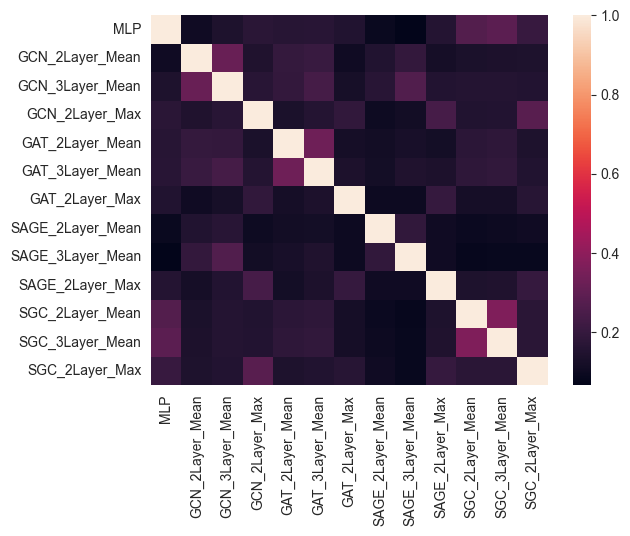

In [7]:
dataset = '20news_group'
df = pd.DataFrame([], columns=words_omission[dataset].keys())
for i, el1 in enumerate(words_omission[dataset].keys()):
    row = {}
    for el2 in words_omission[dataset].keys():
        row[el2] = jaccard_similarity_dataset(words_omission[dataset][el1],
                                              words_omission[dataset][el2])
    df = pd.concat([df, pd.DataFrame([row])])
df.index = words_omission[dataset].keys()
pl = sns.heatmap(df)
fig = pl.get_figure()
fig.savefig("omission_20.png", bbox_inches = "tight")

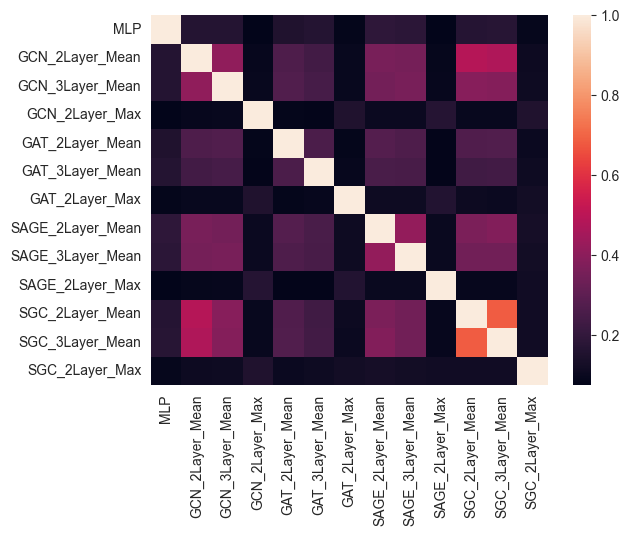

In [8]:
dataset = 'movie'
df = pd.DataFrame([], columns=words_omission[dataset].keys())
for i, el1 in enumerate(words_omission[dataset].keys()):
    row = {}
    for el2 in words_omission[dataset].keys():
        row[el2] = jaccard_similarity_dataset(words_omission[dataset][el1],
                                              words_omission[dataset][el2])
    df = pd.concat([df, pd.DataFrame([row])])
df.index = words_omission[dataset].keys()
pl = sns.heatmap(df)
fig = pl.get_figure()
fig.savefig("omission_movie.png", bbox_inches = "tight")

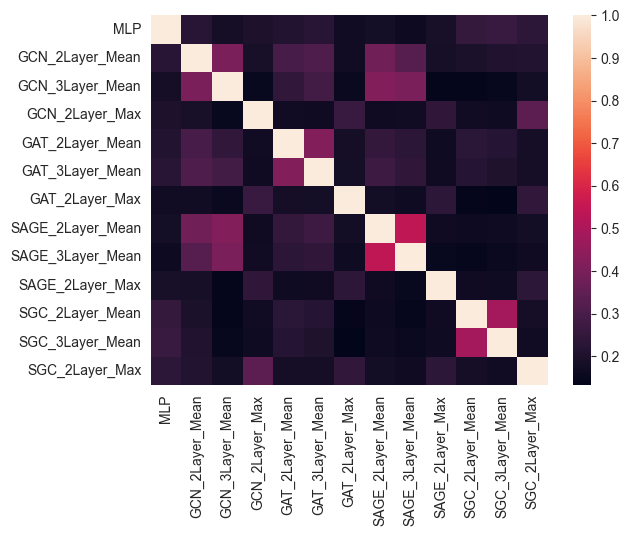

In [9]:
dataset = '20news_group'
df = pd.DataFrame([], columns=words_saliency[dataset].keys())
for i, el1 in enumerate(words_saliency[dataset].keys()):
    row = {}
    for el2 in words_saliency[dataset].keys():
        row[el2] = jaccard_similarity_dataset(words_saliency[dataset][el1],
                                              words_saliency[dataset][el2])
    df = pd.concat([df, pd.DataFrame([row])])
df.index = words_saliency[dataset].keys()
pl = sns.heatmap(df)
fig = pl.get_figure()
fig.savefig("saliency_20.png", bbox_inches = "tight")

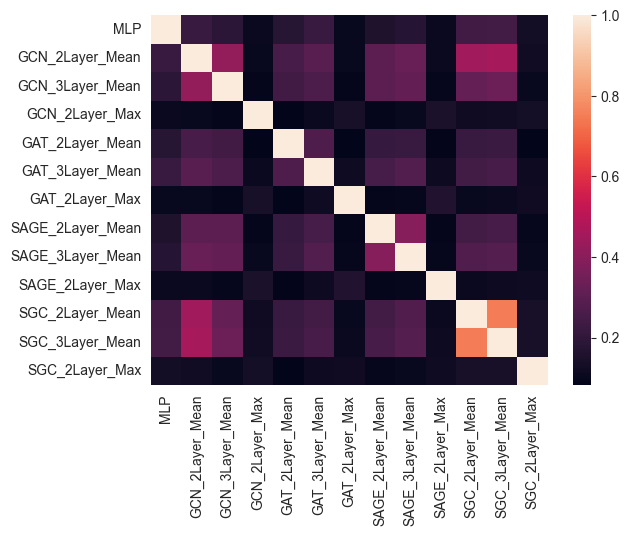

In [10]:
dataset = 'movie'
df = pd.DataFrame([], columns=words_saliency[dataset].keys())
for i, el1 in enumerate(words_saliency[dataset].keys()):
    row = {}
    for el2 in words_saliency[dataset].keys():
        row[el2] = jaccard_similarity_dataset(words_saliency[dataset][el1],
                                              words_saliency[dataset][el2])
    df = pd.concat([df, pd.DataFrame([row])])
df.index = words_saliency[dataset].keys()
pl = sns.heatmap(df)
fig = pl.get_figure()
fig.savefig("saliency_movie.png", bbox_inches = "tight")

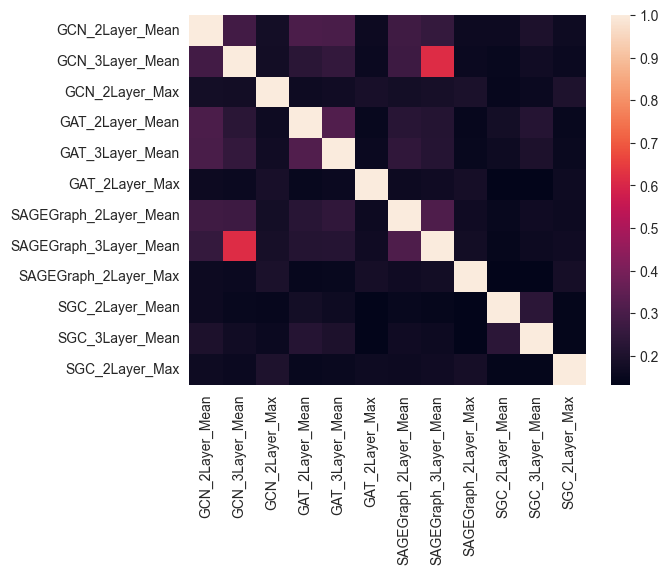

In [12]:
dataset = '20news_group'
df = pd.DataFrame([], columns=words_gnne[dataset].keys())
for i, el1 in enumerate(words_gnne[dataset].keys()):
    row = {}
    for el2 in words_gnne[dataset].keys():
        row[el2] = jaccard_similarity_dataset(words_gnne[dataset][el1],
                                              words_gnne[dataset][el2])
    df = pd.concat([df, pd.DataFrame([row])])
df.index = words_gnne[dataset].keys()
pl = sns.heatmap(df)
fig = pl.get_figure()
fig.savefig("gnne_20.png", bbox_inches = "tight")

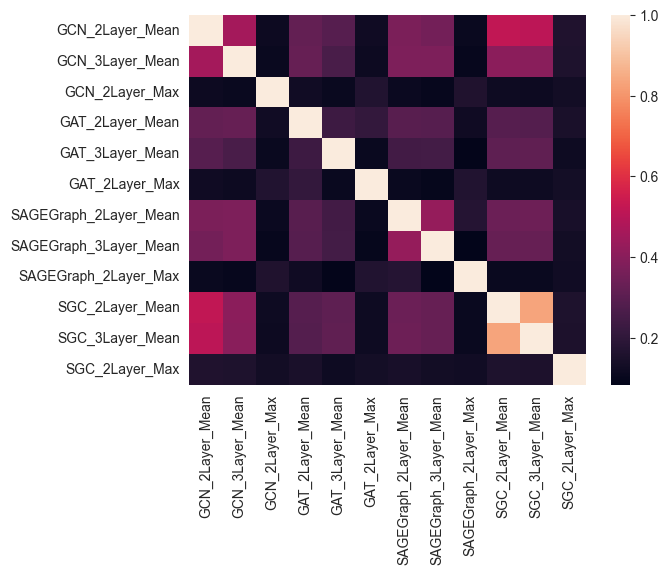

In [13]:
dataset = 'movie'
df = pd.DataFrame([], columns=words_gnne[dataset].keys())
for i, el1 in enumerate(words_gnne[dataset].keys()):
    row = {}
    for el2 in words_gnne[dataset].keys():
        row[el2] = jaccard_similarity_dataset(words_gnne[dataset][el1],
                                              words_gnne[dataset][el2])
    df = pd.concat([df, pd.DataFrame([row])])
df.index = words_gnne[dataset].keys()
pl = sns.heatmap(df)
fig = pl.get_figure()
fig.savefig("gnne_movie.png", bbox_inches = "tight")